import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [6]:
data.shape

(7920, 3)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

data.isnull()

In [11]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# Text Preprocessing

In [12]:
import re
import string

In [13]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

## convert uppercase to lowercase

In [15]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## Remove Links

In [17]:
data['tweet']=data['tweet'].apply(lambda x : " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE)for x in x.split()))

In [18]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## Remove Punctuations

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data['tweet']=data['tweet'].apply(remove_punctuations)

In [23]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [24]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## Remove Numbers

In [26]:
data['tweet']=data['tweet'].str.replace('\d+','',regex=True)

In [27]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## Remove Stop Words

In [30]:
pip install nltk

     |████████████████████████████████| 1.5 MB 174 kB/s eta 0:00:01
  Using cached click-8.1.8-py3-none-any.whl (98 kB)
     |████████████████████████████████| 309 kB 108 kB/s eta 0:00:01
     |████████████████████████████████| 288 kB 525 kB/s eta 0:00:01
You should consider upgrading via the '/Volumes/My Disk 2/My Projects/Sentiment-Analysis-Project/env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
import nltk

In [32]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
with open ('../static/model/corpora/stopwords/english','r') as file:
    sw= file.read().splitlines()

In [34]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [36]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [37]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

## Stemming (get the base word)

In [38]:
from nltk.stem import PorterStemmer

In [39]:
ps=PorterStemmer()


In [41]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [42]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [43]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabluary

In [45]:
from collections import Counter

In [50]:
vocab = Counter()

In [51]:
Counter()

Counter()

In [52]:
vocab

Counter()

In [54]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [55]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [56]:
len(vocab)

15949

In [57]:
data.shape


(7920, 3)

In [58]:
tokens = [key for key in vocab if vocab[key]>10]

In [59]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [61]:
len(tokens)

1145

In [63]:
def save_vocabluary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()

save_vocabluary(tokens,'../static/model/vacabluary.txt')

In [65]:
x= data['tweet']
y= data['label']

In [66]:
pip install scikit-learn

     |████████████████████████████████| 11.1 MB 644 kB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 2.2 MB/s eta 0:00:01
You should consider upgrading via the '/Volumes/My Disk 2/My Projects/Sentiment-Analysis-Project/env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [73]:
x_train.shape


(6336,)

In [75]:
x_test.shape

(1584,)

In [76]:
y_test

566     0
4125    0
5323    1
264     0
4347    0
       ..
3268    0
7115    0
1175    0
4326    0
3861    0
Name: label, Length: 1584, dtype: int64

In [77]:
y_train

2852    0
1709    0
3642    0
6181    1
1571    1
       ..
2858    0
4219    0
5086    0
1313    0
6358    0
Name: label, Length: 6336, dtype: int64

In [78]:
x_train

2852    fuck hotdog hamburg poutin belleprovinc non si...
1709    love ear thankyou babi randomgift justbecaus s...
3642    day redu selfi decemberphotochalleng nativ gal...
6181                  appl start suck…it doesnt work need
1571    say custom fuck put ose appl io tvo annoy fool...
                              ...                        
2858    becom think instaboy instamo iphon rayban retr...
4219    get appl made case iphon loyalti iphonelov lea...
5086    dont care instadaili moment stranger appl red ...
1313    winter wonderland winterwonderland hydepark ic...
6358    that better qualiti selfi p natur river endles...
Name: tweet, Length: 6336, dtype: object

In [79]:
x_test

566     yeapp phone nice camera got skill �� opo onepl...
4125    china town dong dong qiang lion danc chinatown...
5323    fuck cant download music alreadi purchas itun ...
264     sunday im tranna cram work sunday mac macbook ...
4347    appl iphon leather case smart appl iphon style...
                              ...                        
3268    follow capetownsup instagram sup surf fun cape...
7115    sunday squareadi sunday relax home iphon insta...
1175    white toy white smoke iger capetown samsung ap...
4326    oneplu getpeid brand new oneplu wow neversettl...
3861    cant wait til phone contract fuck iphon hatemy...
Name: tweet, Length: 1584, dtype: object

### Vectorization

In [84]:
def vectorizer(ds,vocabluary):
    vectorized_lst =[]

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabluary))

        for i in range(len(vocabluary)):
            if vocabluary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst,dtype=np.float32)

    return vectorized_lst_new

In [92]:
vectorized_x_train = vectorizer(x_train,tokens)

In [93]:
vectorized_x_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
vectorized_x_test = vectorizer(x_test,tokens)

In [95]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
y_train.value_counts()

label
0    4696
1    1640
Name: count, dtype: int64

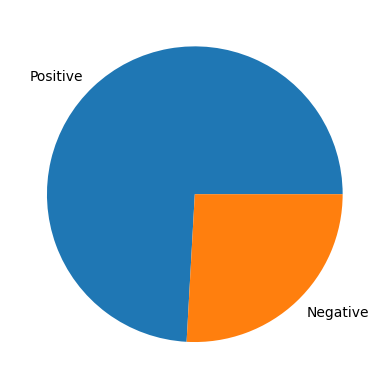

In [101]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()